In [147]:
%load_ext autoreload
%load_ext notexbook
%autoreload 2
%load_ext autotime

import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
import glob
import seaborn as sns
import sys
sys.path.append("..")
from tqdm import tqdm
import networkx as nx

plt.style.use("../config/custom_plt.mplstyle")

from generate_incomplete_graph import *
from compute_precision_vs_missing_links import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The notexbook extension is already loaded. To reload it, use:
  %reload_ext notexbook
The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 20.1 ms (started: 2024-03-21 11:52:08 +01:00)


In [171]:
COLORS = ['#2D1E2F', '#F7B32B', '#21A179', '#8E7DBE', '#F72C25']

def load_loglikelihood(path):    
    p1 = list(glob.glob(f'{path}/umap_ml/*.loglikelihood'))[0]
    p2 = list(glob.glob(f'{path}/le_ml/*.loglikelihood'))[0]
    return np.loadtxt(p1), np.loadtxt(p2)


def plot_loglikelihood(path, title, ax, with_legend=False):
    likelihood_umap_ml, likelihood_le_ml = load_loglikelihood(path)
    ax.plot(likelihood_umap_ml[:, 0], likelihood_umap_ml[:, 1], '.-', label=f'$FiD$-Mercator', color=COLORS[1])
    ax.plot(likelihood_le_ml[:, 0], likelihood_le_ml[:, 1], '.-', label=f'$D$-Mercator', color=COLORS[2])
    
    if with_legend:
        ax.legend()
        
    ax.set_title(rf'\textbf{{{title}}}')
    
    
def plot_minus_loglikelihood(path, title, ax, with_legend=False, log_scale=True):
    likelihood_umap_ml, likelihood_le_ml = load_loglikelihood(path)
    ax.plot(likelihood_umap_ml[:, 0], -likelihood_umap_ml[:, 1], '.-', label=f'$FiD$-Mercator', color=COLORS[1])
    ax.plot(likelihood_le_ml[:, 0], -likelihood_le_ml[:, 1], '.-', label=f'$D$-Mercator', color=COLORS[2])
    
    if log_scale:
        ax.set_yscale('log')
    if with_legend:
        ax.legend()
        
    ax.set_title(rf'\textbf{{{title}}}')

time: 2.1 ms (started: 2024-03-21 11:59:43 +01:00)


In [172]:
path_citeeer = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/citeseer/umap_new/"
path_cora = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/cora/umap_new/"
path_dblp = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/dblp/umap_new/"
path_imdb = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/imdb/umap_new/"
path_amazon_photo = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/amazon_photo/umap_new/"
path_cornell = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/webkb/cornell/umap_new/"
path_wisconsin = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/webkb/wisconsin/umap_new/"
path_texas = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/webkb/texas/umap_new/"
path_lastfm = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/lastfm_asia/umap_new/"
path_twitch_ptbr = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/twitch/PTBR/umap_new/"

time: 1.41 ms (started: 2024-03-21 11:59:44 +01:00)


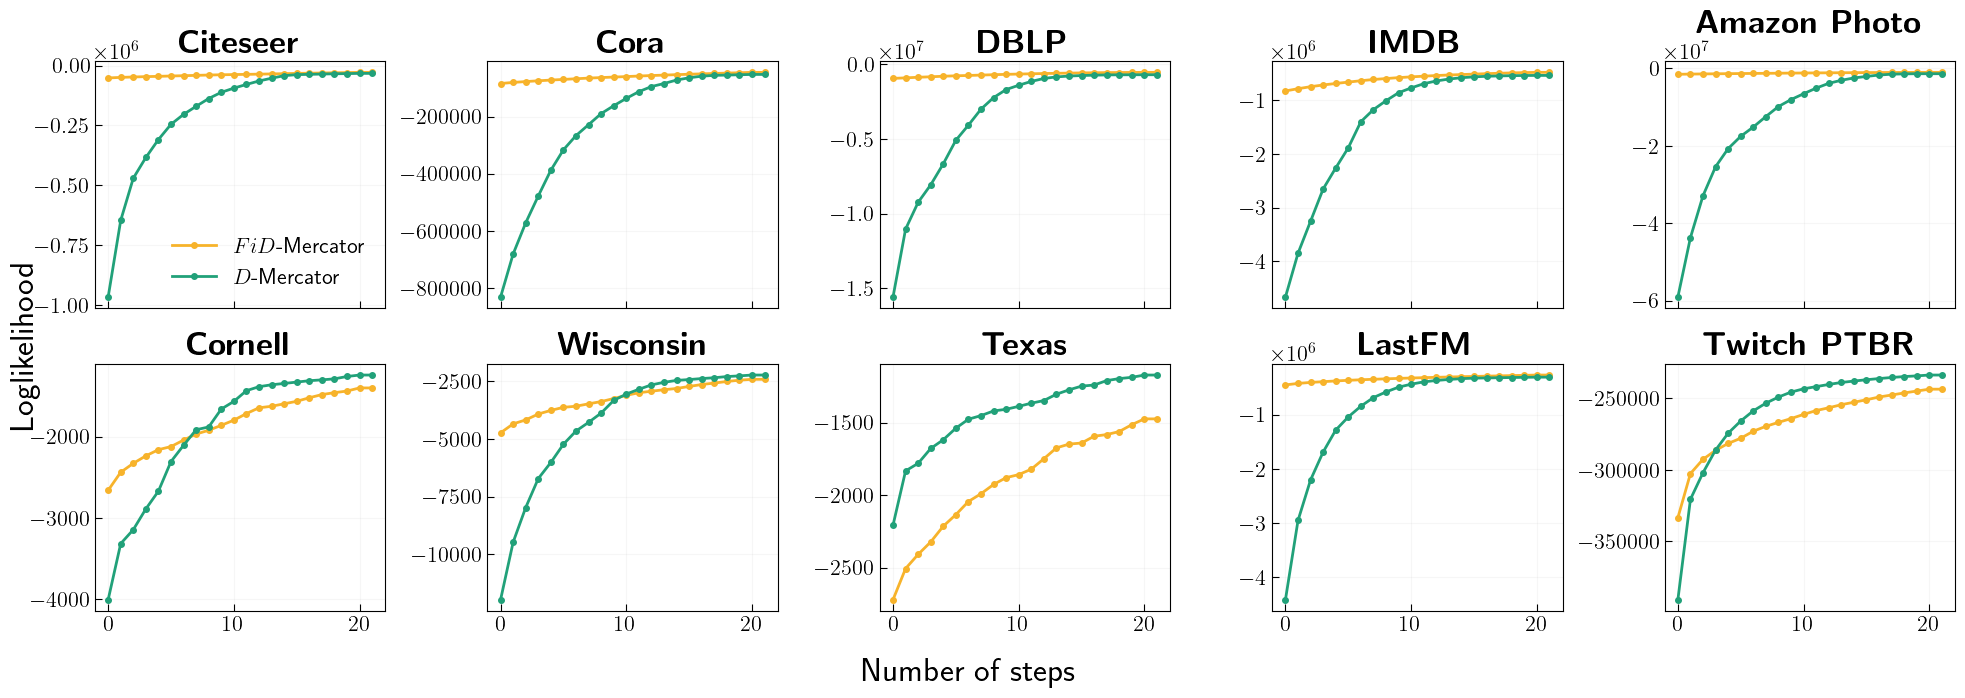

time: 3.93 s (started: 2024-03-21 15:29:50 +01:00)


In [223]:
fig, axs = plt.subplots(2, 5, sharex=True, figsize=(20, 7))

plt.subplot(2, 5, 1)
plot_loglikelihood(path_citeeer, 'Citeseer', axs[0, 0], True)

plt.subplot(2, 5, 2)
plot_loglikelihood(path_cora, 'Cora', axs[0, 1])

plt.subplot(2, 5, 3)
plot_loglikelihood(path_dblp, 'DBLP', axs[0, 2])

plt.subplot(2, 5, 4)
plot_loglikelihood(path_imdb, 'IMDB', axs[0, 3])

plt.subplot(2, 5, 5)
plot_loglikelihood(path_amazon_photo, 'Amazon Photo',  axs[0, 4])

plt.subplot(2, 5, 6)
plot_loglikelihood(path_cornell, 'Cornell', axs[1, 0])

plt.subplot(2, 5, 7)
plot_loglikelihood(path_wisconsin, 'Wisconsin', axs[1, 1])

plt.subplot(2, 5, 8)
plot_loglikelihood(path_texas, 'Texas', axs[1, 2])

plt.subplot(2, 5, 9)
plot_loglikelihood(path_lastfm, 'LastFM', axs[1, 3])

plt.subplot(2, 5, 10)
plot_loglikelihood(path_twitch_ptbr, 'Twitch PTBR', axs[1, 4])

fig.supxlabel('Number of steps', fontsize=24)
fig.supylabel('Loglikelihood', fontsize=24)
    
plt.tight_layout()

# plt.savefig("/home/rob/Dropbox/NodesFeaturesEmbeddings/Report/for-response-to-referees-18-03-24/plots/loglikelihood.pdf")

# plt.savefig("/home/rob/Dropbox/NodesFeaturesEmbeddings/ReSubmission_npjC/Paper/SI/plots/global_loglikelihood.pdf")


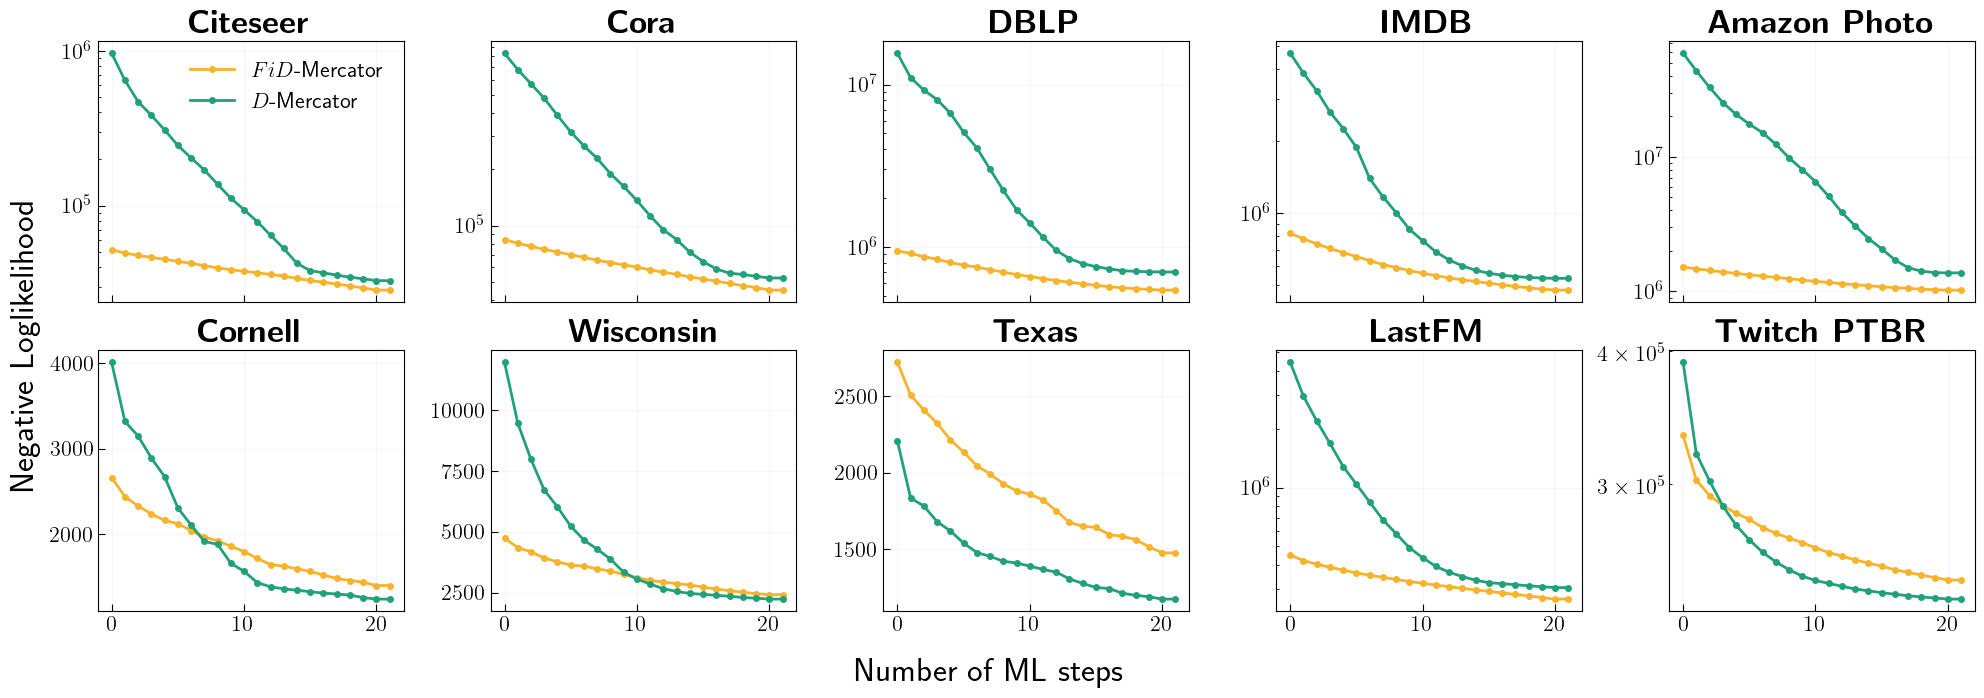

time: 6.11 s (started: 2024-03-21 15:29:39 +01:00)


In [222]:
fig, axs = plt.subplots(2, 5, sharex=True, figsize=(20, 7))

plt.subplot(2, 5, 1)
plot_minus_loglikelihood(path_citeeer, 'Citeseer', axs[0, 0], True)

plt.subplot(2, 5, 2)
plot_minus_loglikelihood(path_cora, 'Cora', axs[0, 1])

plt.subplot(2, 5, 3)
plot_minus_loglikelihood(path_dblp, 'DBLP', axs[0, 2])

plt.subplot(2, 5, 4)
plot_minus_loglikelihood(path_imdb, 'IMDB', axs[0, 3])

plt.subplot(2, 5, 5)
plot_minus_loglikelihood(path_amazon_photo, 'Amazon Photo',  axs[0, 4])

plt.subplot(2, 5, 6)
plot_minus_loglikelihood(path_cornell, 'Cornell', axs[1, 0], log_scale=False)

plt.subplot(2, 5, 7)
plot_minus_loglikelihood(path_wisconsin, 'Wisconsin', axs[1, 1], log_scale=False)

plt.subplot(2, 5, 8)
plot_minus_loglikelihood(path_texas, 'Texas', axs[1, 2], log_scale=False)

plt.subplot(2, 5, 9)
plot_minus_loglikelihood(path_lastfm, 'LastFM', axs[1, 3])

plt.subplot(2, 5, 10)
plot_minus_loglikelihood(path_twitch_ptbr, 'Twitch PTBR', axs[1, 4])

fig.supxlabel('Number of ML steps', fontsize=24)
fig.supylabel('Negative Loglikelihood', fontsize=24, x=0.01)
    
plt.tight_layout()

# plt.savefig("/home/rob/Dropbox/NodesFeaturesEmbeddings/Report/for-response-to-referees-18-03-24/plots/loglikelihood_logscale.pdf")

# plt.savefig("/home/rob/Dropbox/NodesFeaturesEmbeddings/ReSubmission_npjC/Paper/SI/plots/global_loglikelihood_logscale.pdf")



---
---



In [176]:
from numba import jit

@jit(nopython=True)
def compute_mean_angular_distance(x, y):
    mean_angular_distance = 0
    for v, u in zip(x, y):
        a = np.dot(v, u) / (np.linalg.norm(v) * np.linalg.norm(u))
        if a > 1:
            a = 1
        mean_angular_distance += np.arccos(a)
    return mean_angular_distance

def load_coords(path, name, t, filtered_nodes):
    df = pd.read_csv(list(glob.glob(f"{path}/{name}/*.inf_coord_t{t}"))[0], comment="#", sep="\s+",
                    header=None)
    df.columns = ['index', 'kappa', 'radius', 'p1', 'p2', 'p3']
    df['index'] = df['index'].astype(str)
    
    df = df[df['index'].isin(filtered_nodes)]
 
    return df[['p1', 'p2', 'p3']].values


def load_graph(path, name):
    g = nx.read_edgelist(list(glob.glob(f"{path}/{name}/*.edge"))[0])
    return g
    
    
def filter_by_degree(g, min_degree):
    deg = g.degree()
    to_keep = []
    for name, d in deg:
        if d > min_degree:
            to_keep.append(name)
    return g.subgraph(to_keep)
    

def mean_distance_from_initial_embedding(path, name, min_degree=0):
    g = load_graph(path, name)
    g_filtered = filter_by_degree(g, min_degree)
    filtered_nodes = list(g_filtered.nodes())
    
    pos0 = load_coords(path, name, 0, filtered_nodes)
    
    mean_distances = []
    for t in list(range(1, 21)):
        pos_t = load_coords(path, name, t, filtered_nodes)
        mean_distances.append(compute_mean_angular_distance(pos0, pos_t))
    return mean_distances


def plot_mean_distance_from_initial_embedding(path, title, ax, with_legend=False, min_degree=0):
    dist_le_ml = mean_distance_from_initial_embedding(path, 'le_ml', min_degree)
    dist_umap_ml = mean_distance_from_initial_embedding(path, 'umap_ml', min_degree)
    
    ax.plot(dist_umap_ml, marker='.', label=f'$FiD$-Mercator', color=COLORS[1])
    ax.plot(dist_le_ml, marker='.', label=f'$D$-Mercator', color=COLORS[2])
    
    if with_legend:
        ax.legend()
        
    ax.set_title(rf'\textbf{{{title}}}')

time: 3.84 ms (started: 2024-03-21 12:00:06 +01:00)


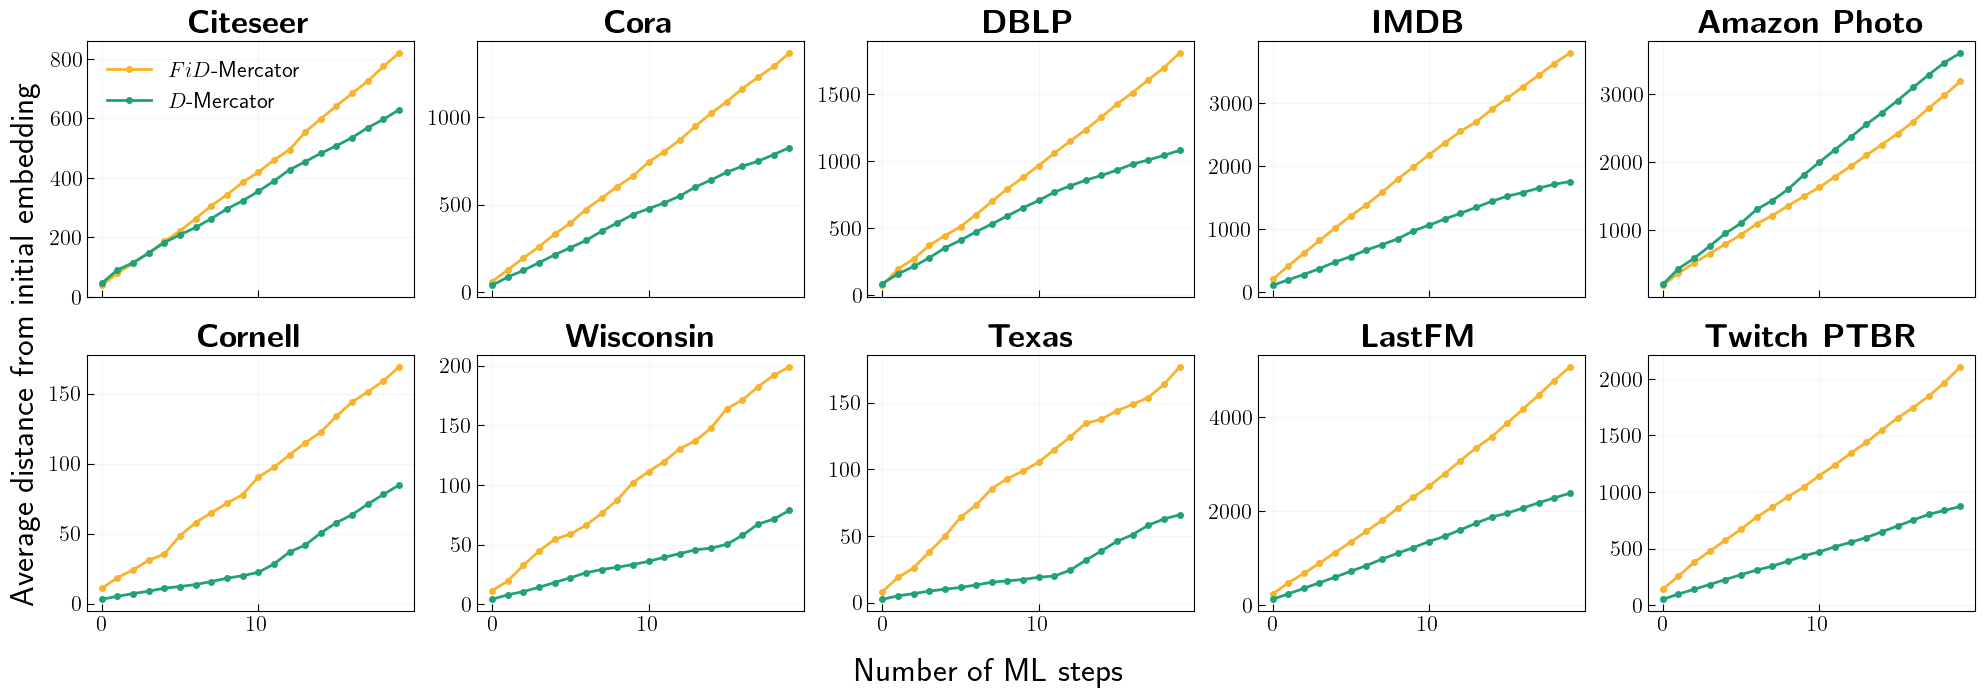

time: 8.51 s (started: 2024-03-21 15:29:04 +01:00)


In [220]:
fig, axs = plt.subplots(2, 5, sharex=True, figsize=(20, 7))

plt.subplot(2, 5, 1)
plot_mean_distance_from_initial_embedding(path_citeeer, 'Citeseer', axs[0, 0], True)

plt.subplot(2, 5, 2)
plot_mean_distance_from_initial_embedding(path_cora, 'Cora', axs[0, 1])

plt.subplot(2, 5, 3)
plot_mean_distance_from_initial_embedding(path_dblp, 'DBLP', axs[0, 2])

plt.subplot(2, 5, 4)
plot_mean_distance_from_initial_embedding(path_imdb, 'IMDB', axs[0, 3])

plt.subplot(2, 5, 5)
plot_mean_distance_from_initial_embedding(path_amazon_photo, 'Amazon Photo',  axs[0, 4])

plt.subplot(2, 5, 6)
plot_mean_distance_from_initial_embedding(path_cornell, 'Cornell', axs[1, 0])

plt.subplot(2, 5, 7)
plot_mean_distance_from_initial_embedding(path_wisconsin, 'Wisconsin', axs[1, 1])

plt.subplot(2, 5, 8)
plot_mean_distance_from_initial_embedding(path_texas, 'Texas', axs[1, 2])

plt.subplot(2, 5, 9)
plot_mean_distance_from_initial_embedding(path_lastfm, 'LastFM', axs[1, 3])

plt.subplot(2, 5, 10)
plot_mean_distance_from_initial_embedding(path_twitch_ptbr, 'Twitch PTBR', axs[1, 4])

fig.supxlabel('Number of ML steps', fontsize=24)
fig.supylabel('Average distance from initial embedding', fontsize=24, x=0.01)

plt.tight_layout()

# plt.savefig("/home/rob/Dropbox/NodesFeaturesEmbeddings/Report/for-response-to-referees-18-03-24/plots/average_distance.pdf")

# plt.savefig("/home/rob/Dropbox/NodesFeaturesEmbeddings/ReSubmission_npjC/Paper/SI/plots/average_distance_from_initial_embedding.pdf")


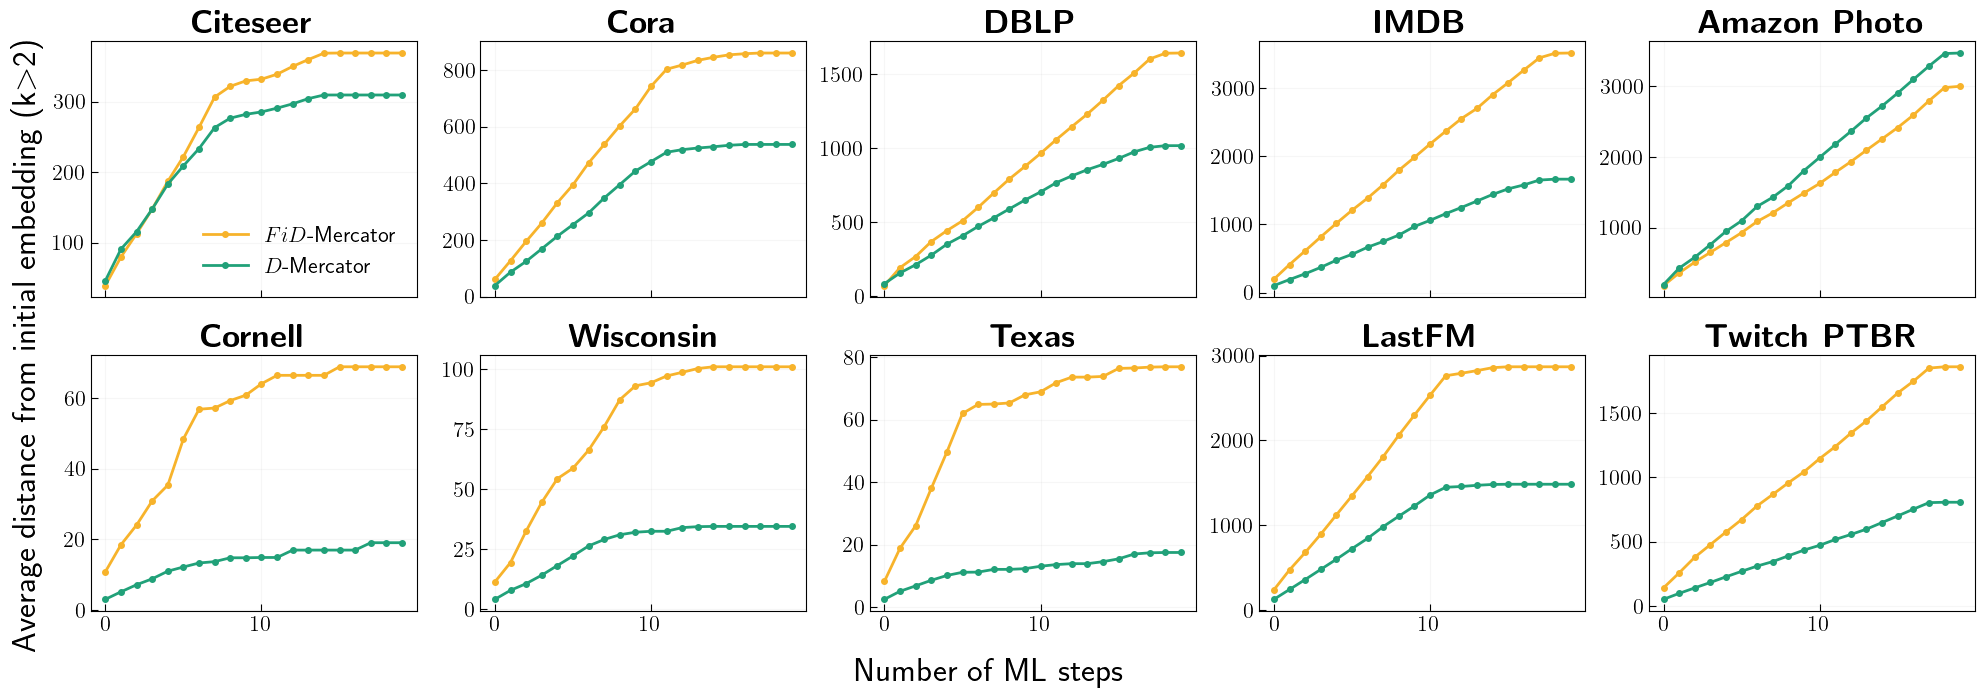

time: 9.54 s (started: 2024-03-21 15:29:17 +01:00)


In [221]:
fig, axs = plt.subplots(2, 5, sharex=True, figsize=(20, 7))

min_degree = 2

plt.subplot(2, 5, 1)
plot_mean_distance_from_initial_embedding(path_citeeer, 'Citeseer', axs[0, 0], True, min_degree)

plt.subplot(2, 5, 2)
plot_mean_distance_from_initial_embedding(path_cora, 'Cora', axs[0, 1], min_degree=min_degree)

plt.subplot(2, 5, 3)
plot_mean_distance_from_initial_embedding(path_dblp, 'DBLP', axs[0, 2], min_degree=min_degree)

plt.subplot(2, 5, 4)
plot_mean_distance_from_initial_embedding(path_imdb, 'IMDB', axs[0, 3], min_degree=min_degree)

plt.subplot(2, 5, 5)
plot_mean_distance_from_initial_embedding(path_amazon_photo, 'Amazon Photo', axs[0, 4], min_degree=min_degree)

plt.subplot(2, 5, 6)
plot_mean_distance_from_initial_embedding(path_cornell, 'Cornell', axs[1, 0], min_degree=min_degree)

plt.subplot(2, 5, 7)
plot_mean_distance_from_initial_embedding(path_wisconsin, 'Wisconsin', axs[1, 1], min_degree=min_degree)

plt.subplot(2, 5, 8)
plot_mean_distance_from_initial_embedding(path_texas, 'Texas', axs[1, 2], min_degree=min_degree)

plt.subplot(2, 5, 9)
plot_mean_distance_from_initial_embedding(path_lastfm, 'LastFM', axs[1, 3], min_degree=min_degree)

plt.subplot(2, 5, 10)
plot_mean_distance_from_initial_embedding(path_twitch_ptbr, 'Twitch PTBR', axs[1, 4], min_degree=min_degree)

fig.supxlabel('Number of ML steps', fontsize=24)
fig.supylabel(r'Average distance from initial embedding (k$>$2)', fontsize=24, x=0.01)

plt.tight_layout()

# plt.savefig("/home/rob/Dropbox/NodesFeaturesEmbeddings/Report/for-response-to-referees-18-03-24/plots/average_distance_min_deg2.pdf")

# plt.savefig("/home/rob/Dropbox/NodesFeaturesEmbeddings/ReSubmission_npjC/Paper/SI/plots/average_distance_from_initial_embedding_min_deg2.pdf")



---
for main text
--

In [214]:
def plot_minus_loglikelihood_main(path, title, ax, with_legend=False):
    likelihood_umap_ml, likelihood_le_ml = load_loglikelihood(path)

    likelihood_umap_ml = likelihood_umap_ml[:-1]
    likelihood_le_ml = likelihood_le_ml[:-1]
    
    ax.plot(likelihood_umap_ml[:, 0], -likelihood_umap_ml[:, 1], 'o-', label=f'$FiD$-Mercator', color=COLORS[1], markersize=6)
    ax.plot(likelihood_le_ml[:, 0], -likelihood_le_ml[:, 1], 's-', label=f'$D$-Mercator', color=COLORS[2], markersize=6)
    
    ax.set_yscale('log')
    
    if with_legend:
        ax.legend()
        
    ax.set_title(rf'\textbf{{{title}}}')
    
    
def plot_mean_distance_from_initial_embedding_main(path, title, ax, with_legend=False, min_degree=0):
    dist_le_ml = mean_distance_from_initial_embedding(path, 'le_ml', min_degree)
    dist_umap_ml = mean_distance_from_initial_embedding(path, 'umap_ml', min_degree)
    
    ax.plot(dist_umap_ml, marker='o', label=f'$FiD$-Mercator', color=COLORS[1], markersize=6)
    ax.plot(dist_le_ml, marker='s', label=f'$D$-Mercator', color=COLORS[2], markersize=6)
    
    if with_legend:
        ax.legend(loc='upper left')
        
    ax.set_title(rf'\textbf{{{title}}}')

time: 1.99 ms (started: 2024-03-21 12:28:24 +01:00)


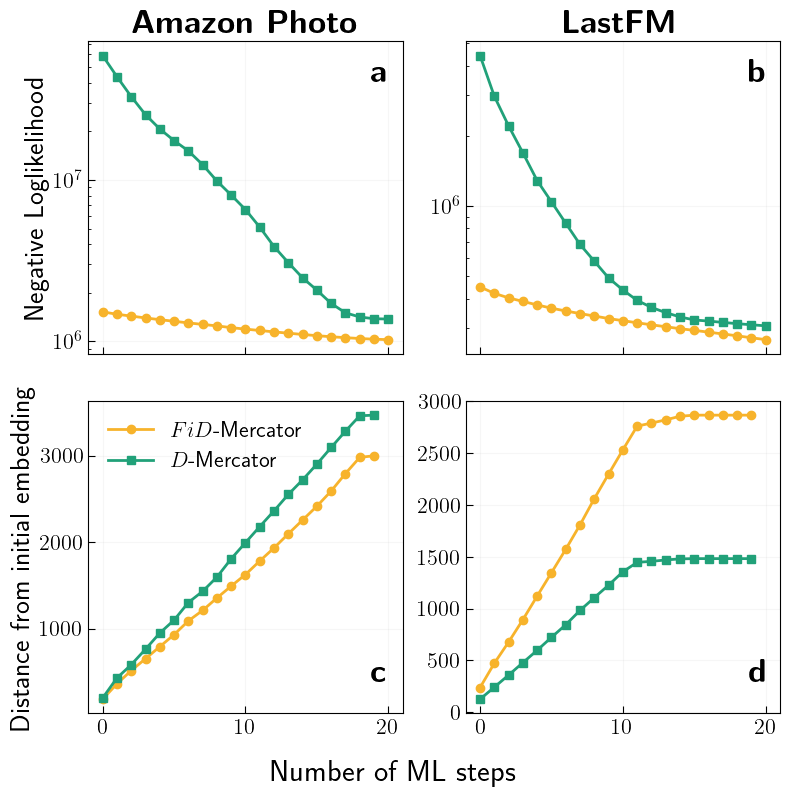

time: 6.05 s (started: 2024-03-21 15:06:36 +01:00)


In [219]:
fig, axs = plt.subplots(2, 2, sharex=True, figsize=(8, 8))

plot_minus_loglikelihood_main(path_amazon_photo, 'Amazon Photo',  axs[0, 0])
plot_mean_distance_from_initial_embedding_main(path_amazon_photo, '', axs[1, 0], min_degree=2, with_legend=True)

axs[0, 0].set_ylabel('Negative Loglikelihood')
axs[1, 0].set_ylabel(r'Distance from initial embedding') # for k>2

plot_minus_loglikelihood_main(path_lastfm, 'LastFM',  axs[0, 1])
plot_mean_distance_from_initial_embedding_main(path_lastfm, '', axs[1, 1], min_degree=2)

axs[0, 0].text(0.9, 0.87, r'$\textbf{a}$', fontsize=24, transform=axs[0,0].transAxes)
axs[0, 1].text(0.9, 0.87, r'$\textbf{b}$', fontsize=24, transform=axs[0,1].transAxes)
axs[1, 0].text(0.9, 0.1, r'$\textbf{c}$', fontsize=24, transform=axs[1,0].transAxes)
axs[1, 1].text(0.9, 0.1, r'$\textbf{d}$', fontsize=24, transform=axs[1,1].transAxes)

fig.supxlabel('Number of ML steps', fontsize=22)

plt.tight_layout()

# plt.savefig("/home/rob/Dropbox/NodesFeaturesEmbeddings/ReSubmission_npjC/Paper/plots/loglikelihood_avg_distance.pdf")
